# Benchmarking
benchmarking using [MQTBench](https://mqt.readthedocs.io/projects/bench/en/latest/Quickstart.html) with QFT for 15 qubits

In [25]:
from lib.distributed_coupling_map import build_coupling_list_ring
from lib.interaction_mapping import InteractionMapping
from lib.interaction_layout import InteractionLayout
from lib.lookahead_routing import DynamicLookaheadSwap

In [26]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.transpiler import PassManager, StagedPassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers.common import generate_embed_passmanager, generate_routing_passmanager
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.converters import circuit_to_dag
from qiskit.visualization import plot_coupling_map, plot_circuit_layout, plot_histogram

In [27]:
from mqt.bench import get_benchmark, CompilerSettings, QiskitSettings

In [28]:
optimization_level = 0
compiler_settings = CompilerSettings(qiskit=QiskitSettings(optimization_level))

Circuit qft[15] -> size: 606 depth: 119


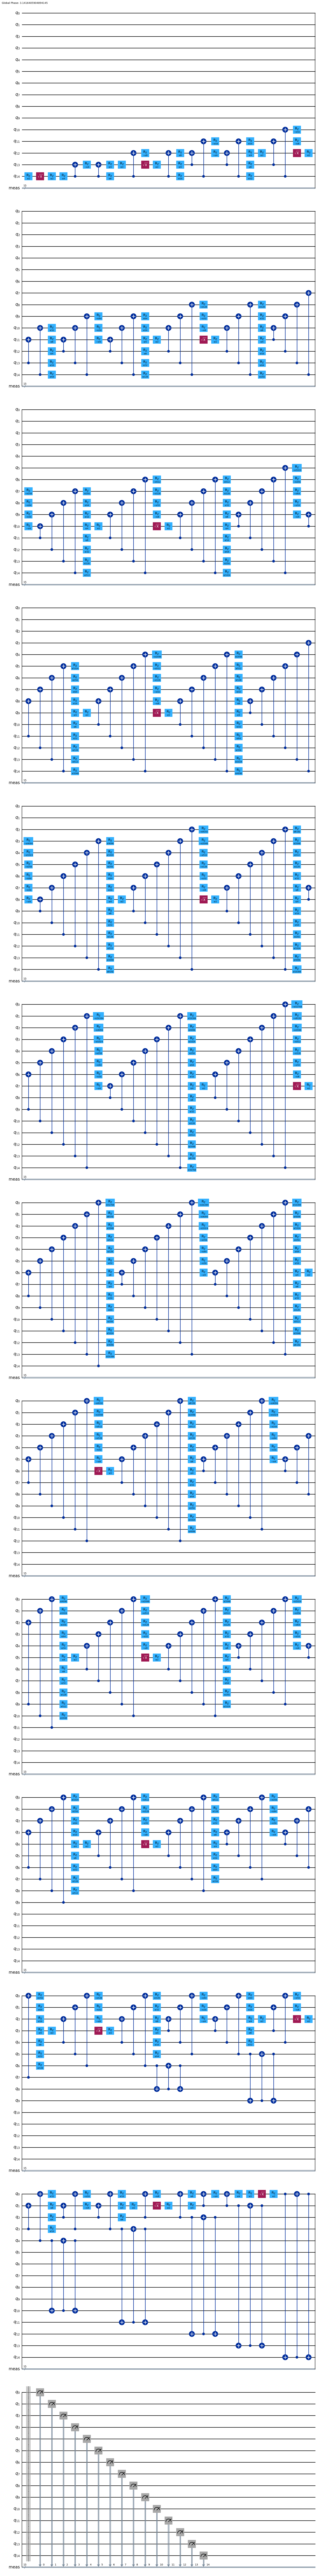

In [29]:
benchmark_name = "qft"
# level = "indep" # but cannot compare because need translation
level = "nativegates"
circuit_size = 15
qc_ghz = get_benchmark(
    benchmark_name=benchmark_name, level=level, circuit_size=circuit_size, 
    compiler="qiskit", compiler_settings=compiler_settings, provider_name="ibm"
)
print(f"Circuit {benchmark_name}[{circuit_size}] -> size: {qc_ghz.size()} depth: {qc_ghz.depth()}")
display(qc_ghz.draw("mpl"))

Transpiled qft[15] -> size: 1080 depth: 332


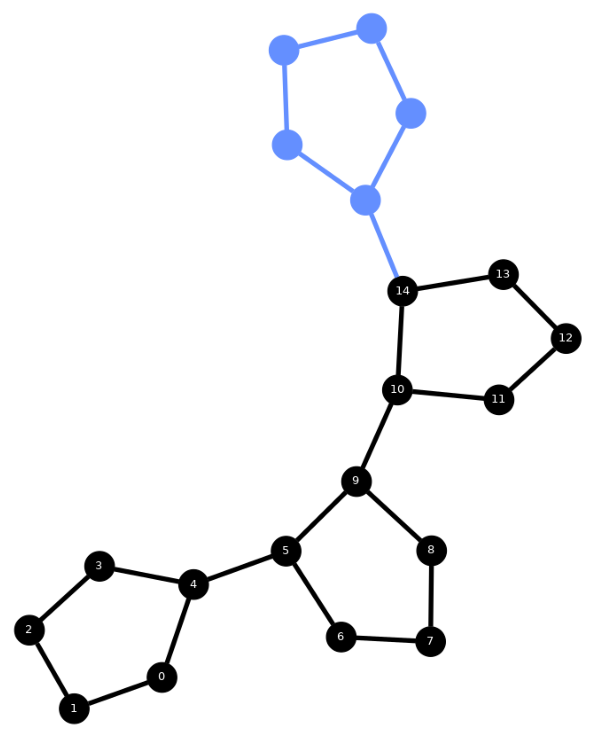

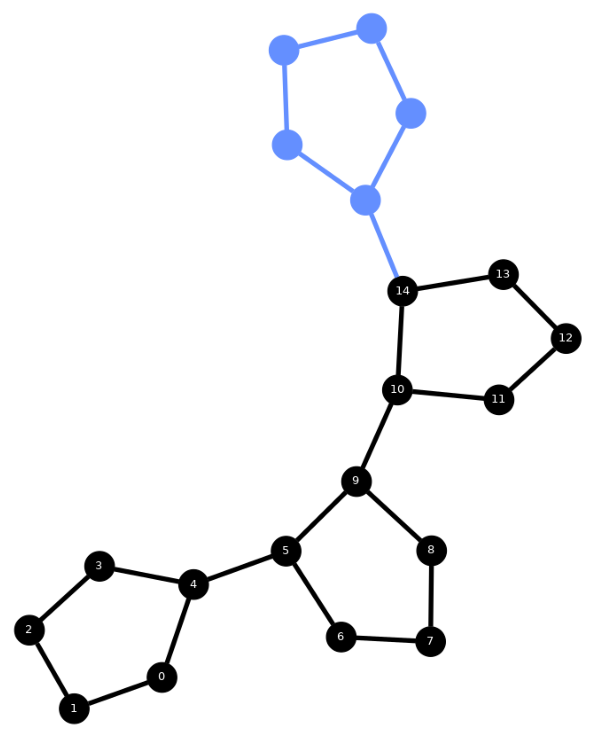

In [30]:
num_qubits = 5
num_group = 4
coupling_list_ring = build_coupling_list_ring(num_qubits, num_group)
coupling_map_ring = CouplingMap(couplinglist=coupling_list_ring)

backend_ring = GenericBackendV2(num_qubits=num_qubits * num_group, coupling_map=coupling_map_ring)
pm = generate_preset_pass_manager(optimization_level, backend=backend_ring)
qc_ghz_isa = pm.run(qc_ghz)
print(f"Transpiled {benchmark_name}[{circuit_size}] -> size: {qc_ghz_isa.size()} depth: {qc_ghz_isa.depth()}")
display(plot_circuit_layout(qc_ghz_isa, backend_ring, view='physical'))
display(plot_circuit_layout(qc_ghz_isa, backend_ring, view='virtual'))

In [32]:
# Define a threshold for significant occurrence
# For example, here we use 10% of the maximum count as the threshold
def get_most_occurence(counts: dict, threshold_index: float = 0.7) -> list:
    threshold = threshold_index * max(counts.values())

    # Filter the keys based on the threshold
    significant_keys = [key for key, value in counts.items() if value > threshold]
    return significant_keys

In [ ]:
job_ring = backend_ring.run(qc_ghz_isa)
counts_ring = job_ring.result().get_counts()
sig_ring_counts = get_most_occurence(counts_ring, 0.7)
sig_ring_counts.sort()

In [35]:
print(sig_ring_counts, "\n", len(sig_ring_counts))

['000001011011100', '000001101000011', '000010010110110', '000011010010000', '000011011101001', '000101000011100', '010000010100000', '010100011000000', '010110001100101', '011100100010100', '100010001100001', '100011011000001', '100100011000000', '101000000010010', '101000011000011', '111001011001000'] 
 16
